# Egyptian HCV

The highest prevalence of HCV infection is present in Egypt, with 92.5% of patients infected with genotype 4, 3.6% patients with genotype 1, 3.2% patients with multiple genotypes, and < 1% patients with other genotypes. Grading the Virus has an impact on the treatment given to the patient this is where Machine Learning Steps in.

### Data Description

**Age**: (Numerical)Age Recorded for each patient.

**Gender**: (Categorical) Gender of Each

**BMI (Body Mass Index)**: (Numerical)  Measure of body fat based on height and weight

**Fever** :(Categorical) Present or Absent 

**Nausea/Vomting**:(Categorical) Present or Absent

**Headache** :(Categorical) Present or Absent

**Diarrhea** : (Categorical) Present or Absent

**Fatigue & generalized bone ache**: (Categorical) Present or Absent 

**Jaundice**: (Categorical) Present or Absent

**Epigastric pain**: (Categorical) Present or Absent

**WBC (White blood cell)**: (Numerical) Count of WBCs

**RBC (Red blood cells)**: (Numerical) Count of WBCs

**HGB (Hemoglobin)**:(Numerical) The range of hemoglobin in blood, it's normal range is for men, 13.5 to 17.5 grams per deciliter. for women, 12.0 to 15.5 grams per deciliter.

**Plat (Platelets)**: (Numerical) The count of blood platelets found. A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood.

**AST 1 (aspartate transaminase ratio)**: (Numerical) Measures the amount of AST enzyme in the blood. AST is normally found in red blood cells, liver, heart, muscle tissue, pancreas, and kidneys.Typically the range for normal AST is reported between 10 to 40 units per liter.

**ALT 1 (alanine transaminase ratio 1 week)**: (Numerical) Measures the amount of ALT enzyme in the blood. it is an enzyme found mostly in the cells of the liver and kidney.the normal ALT range is between 7 to 56 units per liter.

**ALT 4 (alanine transaminase ratio 12 weeks)**: (Numerical)

**ALT 12 (alanine transaminase ratio 4 weeks)**:(Numerical)

**ALT 24 (alanine transaminase ratio 24 weeks)**: (Numerical)

**ALT 36 (alanine transaminase ratio 36 weeks)**: (Numerical)

**ALT 48 (alanine transaminase ratio 48 weeks)**: (Numerical)

**ALT (after 24 w alanine transaminase ratio 24 weeks)**: (Numerical)

**RNA Base**: (Numerical) The count of HCV RNA PCR test is used to determine whether the hepatitis C virus exists in your bloodstream.

**RNA 4**:(Numerical)

**RNA 12**: (Numerical)

**RNA EOT (end-of-treatment)**: (Numerical) 

**RNA EF (Elongation Factor)**: (Numerical)

**Baseline Histological Grading**: (Categorical) Is meant to reflect how quickly the disease is progressing to the end of it's current stage.

**Baseline Histological staging**: (Categorical) It's a measure of how far the disease has progressed in its natural history, where at the end stage the organ fails. there are 4 stages: Portal fibrosis - Periportal fibrosis - Septal fibrosis - Cirrhosis.



### Goal 
Our goal is to predict the Patients Stage given their medical record, this stage is important in the process of treatment

### Content 
1. Data Investigation
    1. Data Gathering & First Insights
    2. Data Cleaning 
    3. Exploratory Data Analysis
2. Training 


In [1]:
# Important Imports 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
color_pallete = sns.color_palette('Blues')

# Data Investigation

### Data Gathering & First Insights

In [3]:
# Read the Data from CSV 
data = pd.read_csv("Data/HCV-Egy-Data/HCV-Egy-Data.csv")
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [5]:
# Data Info and Structure 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               1385 non-null   int64  
 1   Gender                            1385 non-null   int64  
 2   BMI                               1385 non-null   int64  
 3   Fever                             1385 non-null   int64  
 4   Nausea/Vomting                    1385 non-null   int64  
 5   Headache                          1385 non-null   int64  
 6   Diarrhea                          1385 non-null   int64  
 7   Fatigue & generalized bone ache   1385 non-null   int64  
 8   Jaundice                          1385 non-null   int64  
 9   Epigastric pain                   1385 non-null   int64  
 10  WBC                               1385 non-null   int64  
 11  RBC                               1385 non-null   float64
 12  HGB   

In [6]:
data.describe().iloc[:, 13:]

,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


### Commments 
From the previous first insights we discover that:
- There are no missing values which is a relief
- Most of the Column names need to be renamed for better accessibility using pandas and more Readability
- AST, RNA and ALT are numerical values however they can be categorized for better interpretation as they only mean that the patient is normal or in an abnormal level 

So at data Cleaning we are going to address these problems and move to the next phase

## Profiling 

Using the Pandas Profiling tool for a quick glance at the data and the attributes relationships, we saved the profile to an html file to reduce notebook size

In [7]:
from pandas_profiling import ProfileReport

In [8]:
profile = ProfileReport(data, explorative=True, title="HCV Exploration")

In [9]:
profile.to_file("HCV_Report.html")

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning 

### Renaming Columns

In [10]:
# Function that Joins all List Items with a seperator, That if the List Items are Strings 
def join(iterator, seperator):
    it = map(str, iterator)
    seperator = str(seperator)
    string = next(it, '')
    for s in it:
        string += seperator + s
    return string

In [11]:
# Rename Columns for better usage 
attributes = data.columns

# Column names with extra space in the end
split_attrs = np.r_[14:16, 17:28]
split_colms = {i: join(i.split(' '), '_') for i in attributes[split_attrs]}

# Column names that contains spaces 
del_attrs = np.r_[[0, 5, 6, 8]]
del_colms = {i: i[:-1] for i in attributes[del_attrs]}

# Combine all the Edits in one Dict
attrs_new = {
    attributes[4]: 'Nausea',
    attributes[7]: 'Fatigue',
    attributes[9]: 'Epigastric_pain',
    attributes[16]: 'ALT_4',
    attributes[28]: 'Baseline_histological_staging'
}
attrs_new.update(del_colms)
attrs_new.update(split_colms)

In [12]:
# Rename Columns 
data_clean = data.rename(columns=attrs_new)

In [13]:
data_clean.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea', 'Headache', 'Diarrhea',
       'Fatigue', 'Jaundice', 'Epigastric_pain', 'WBC', 'RBC', 'HGB', 'Plat',
       'AST_1', 'ALT_1', 'ALT_4', 'ALT_12', 'ALT_24', 'ALT_36', 'ALT_48',
       'ALT_after_24_w', 'RNA_Base', 'RNA_4', 'RNA_12', 'RNA_EOT', 'RNA_EF',
       'Baseline_histological_Grading', 'Baseline_histological_staging'],
      dtype='object')

### Categorization

Using the Categories provied by the Authors we will divide RNA, ALT and AST values.

In [14]:
# Loading Data Description 
desciption = pd.read_csv('Data/HCV-Egy-Data/Discretization-Criteria.csv')
desciption

,Feature Names,Feature Values,Discretization (Items)
0,Age,32:61,"[0; 32], ]32; 37], ]37; 42],]42; 47], ]47; 52]..."
1,Gender,"Male,Female","[Male], [Female]"
2,BMI(Body Mass Index),22:35,"[0; 18:5[ [18:5; 25[, [25; 30[, [30; 35[, [35;..."
3,Fever,"Absent, Present","[Absent], [Present] -"
4,Nausea/Vomiting,"Absent, Present","[Absent], [Present] -"
5,Headache,"Absent, Present","[Absent], [Present] -"
6,Diarrhea,"Absent, Present","[Absent], [Present] -"
7,Fatigue,"Absent, Present","[Absent], [Present] -"
8,Bone ache,"Absent, Present","[Absent], [Present] -"
9,Jaundice,"Absent, Present","[Absent], [Present] -"


In [15]:
# Descritize the last columns to normal and upnormal 
# Define Categorized Columns and their bins
alt_cols = np.r_[14:22]
alt_bins = [0, 20, 40, 128]
rna_cols = np.r_[22:27]
rna_bins = [0, 5, np.inf]

for col in alt_cols:
    data_clean.iloc[:, col] = pd.cut(data_clean.iloc[:, col], bins=alt_bins, labels=[0, 1, 2])
for col in rna_cols:
    data_clean.iloc[:, col] = pd.cut(data_clean.iloc[:, col], bins=rna_bins, labels=[0, 1])


In [16]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Age                            1385 non-null   int64   
 1   Gender                         1385 non-null   int64   
 2   BMI                            1385 non-null   int64   
 3   Fever                          1385 non-null   int64   
 4   Nausea                         1385 non-null   int64   
 5   Headache                       1385 non-null   int64   
 6   Diarrhea                       1385 non-null   int64   
 7   Fatigue                        1385 non-null   int64   
 8   Jaundice                       1385 non-null   int64   
 9   Epigastric_pain                1385 non-null   int64   
 10  WBC                            1385 non-null   int64   
 11  RBC                            1385 non-null   float64 
 12  HGB                            138

## Exploratory Data Analysis

In this Phase we explore our data and dive deep into the relationships between our attributes and our target variable. 

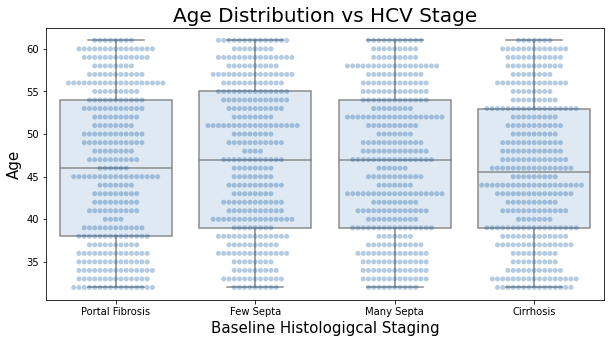

In [17]:
# Age and Stage
fig, ax = plt.subplots(figsize=(10, 5))

# Figure Specifications
sns.boxplot(ax=ax, x=data_clean.Baseline_histological_staging, y=data_clean.Age, color=color_pallete[0])
sns.swarmplot(ax=ax, x=data_clean.Baseline_histological_staging, y=data_clean.Age, alpha=0.3, color=color_pallete[-1])

# Plot Customizations 
plt.title("Age Distribution vs HCV Stage", fontsize=20)
plt.xlabel("Baseline Histologigcal Staging", fontsize=15)
plt.ylabel("Age", fontsize=15)

plt.xticks([0,1,2,3], ['Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis'])
plt.show()

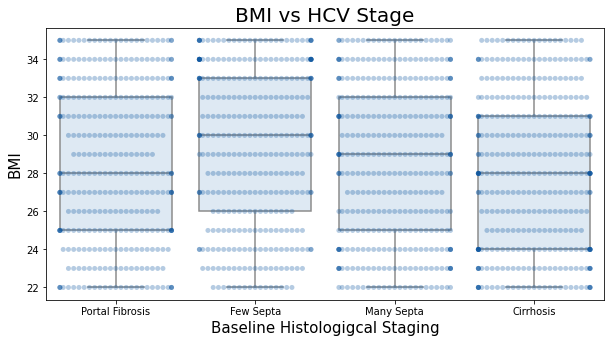

In [60]:
# BMI Vs HCV
fig, ax = plt.subplots(figsize=(10, 5))

# Figure Specifications
sns.boxplot(ax=ax, x=data_clean.Baseline_histological_staging, y=data_clean.BMI, color=color_pallete[0])
sns.swarmplot(ax=ax, x=data_clean.Baseline_histological_staging, y=data_clean.BMI, alpha=0.3, color=color_pallete[-1])

# Plot Customizations 
plt.title("BMI vs HCV Stage", fontsize=20)
plt.xlabel("Baseline Histologigcal Staging", fontsize=15)
plt.ylabel("BMI", fontsize=15)

plt.xticks([0,1,2,3], ['Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis'])
plt.show()

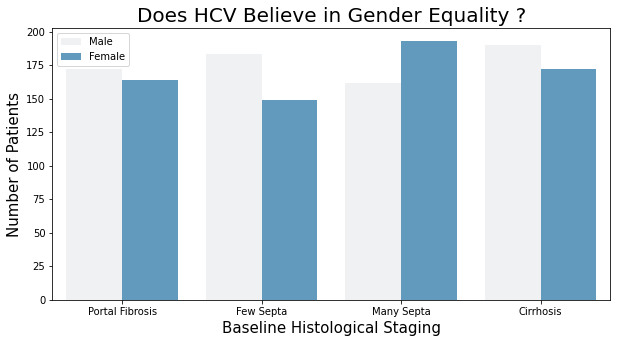

In [18]:
# Gender Vs HCV
fig, ax = plt.subplots(figsize=(10, 5))

# Figure Specifications
sns.countplot(x=data_clean.Baseline_histological_staging, hue=data_clean.Gender,color=color_pallete[3])

# Plot Customizations 
plt.title("Does HCV Believe in Gender Equality ?", fontsize=20)
plt.xlabel("Baseline Histological Staging", fontsize=15)
plt.ylabel("Number of Patients", fontsize=15)
plt.legend(['Male', 'Female'])

plt.xticks([0,1,2,3], ['Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis'])
plt.show()

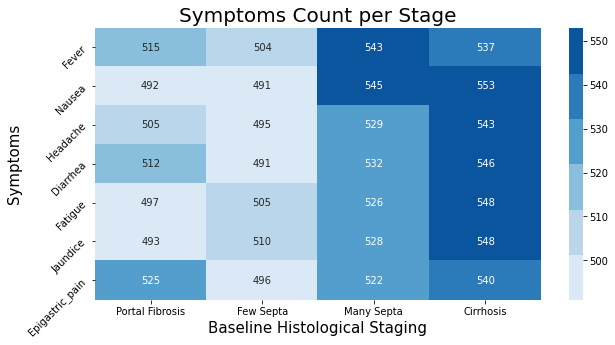

In [19]:
# Patients Symptoms 
fig, ax = plt.subplots(figsize=(10, 5))

# Count Symptoms per Stage
count = data_clean.groupby(data_clean.Baseline_histological_staging.name).sum().reset_index().iloc[:, np.r_[4:11]].transpose()
sns.heatmap(count, ax=ax, cmap=color_pallete, annot=True, fmt='d')

# Customizations
plt.xticks([0.5,1.5,2.5,3.5], ['Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis'])
plt.yticks(rotation=45)
plt.ylabel("Symptoms", fontsize=15)
plt.xlabel("Baseline Histological Staging", fontsize=15)
plt.title("Symptoms Count per Stage", fontsize=20)

plt.show()

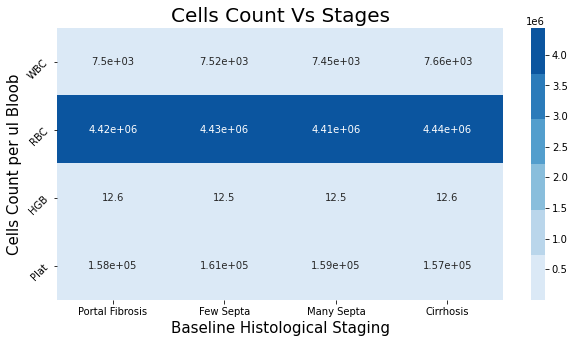

In [20]:
# Cells Count
fig, ax = plt.subplots(figsize=(10, 5))

# Query the Data
avg = data_clean.groupby(data_clean.Baseline_histological_staging).mean().reset_index().iloc[:, 11: 15].transpose()

# Plotting 
sns.heatmap(avg, cmap=color_pallete, annot=True, fmt='.3g')

# Plot Customizations 
plt.xticks([0.5,1.5,2.5,3.5], ['Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis'])
plt.yticks(rotation=45)

plt.ylabel("Cells Count per ul Bloob", fontsize=15)
plt.xlabel("Baseline Histological Staging", fontsize=15)
plt.title("Cells Count Vs Stages", fontsize=20)

plt.show()

In [21]:
# Query the counts of each category in each of the PCR Attributes 
gr = data_clean.iloc[:, np.r_[14: 27, [28]]]
out = []

for col in gr.columns[:-1]:
    temp = gr.groupby([gr.Baseline_histological_staging.name, col]).size().unstack()
    temp.columns = temp.columns.astype(str)
    temp.columns = col+'_'+temp.columns
    out.append(temp)
    
# Conact all the Categories in one Dataframe 
out = pd.concat(out, axis=1).reset_index()

# Transpose for better Interpretation and plotting 
out = out.transpose()

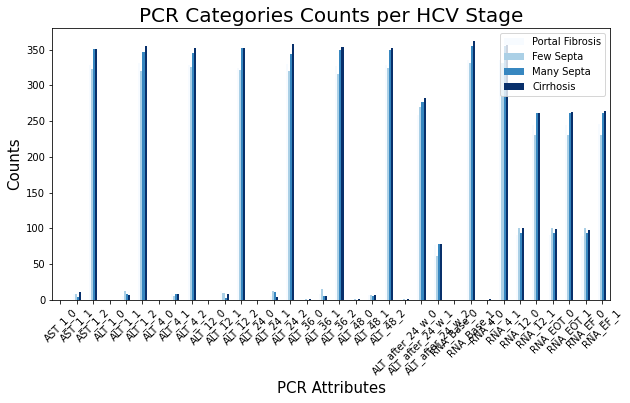

In [22]:
# Plot PCR Attributes Categories 
fig, ax = plt.subplots(figsize=(10, 5))

# Query the data and plot it 
out.iloc[1:, :].plot(kind='bar', ax=ax, rot=45, colormap='Blues')

# Plot Customizations 
plt.title("PCR Categories Counts per HCV Stage", fontsize=20)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('PCR Attributes', fontsize=15)
plt.legend(['Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis'])

plt.show()

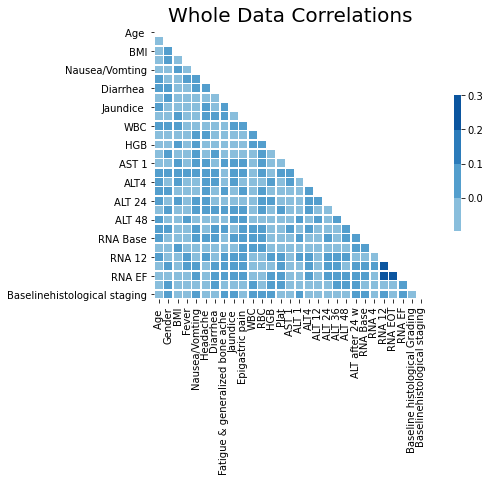

In [23]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=color_pallete, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Whole Data Correlations", fontsize=20)
plt.show()

c:\users\moham\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


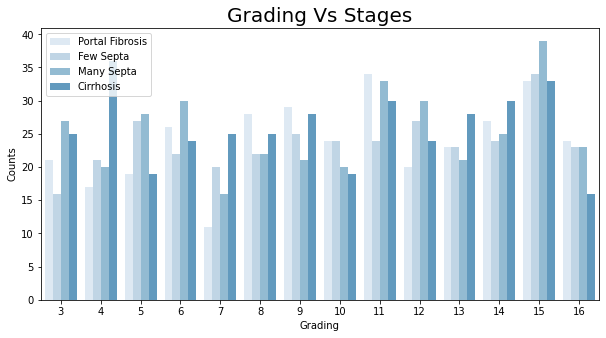

In [24]:
# Grading vs Stages 
fig, ax = plt.subplots(figsize=(10, 5))

# Plot
sns.countplot(data_clean.Baseline_histological_Grading, hue=data_clean.Baseline_histological_staging, palette=color_pallete)

# Customizations 
plt.title('Grading Vs Stages', fontsize=20)
plt.xlabel('Grading')
plt.ylabel('Counts')
plt.legend(['Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis'])

plt.show()

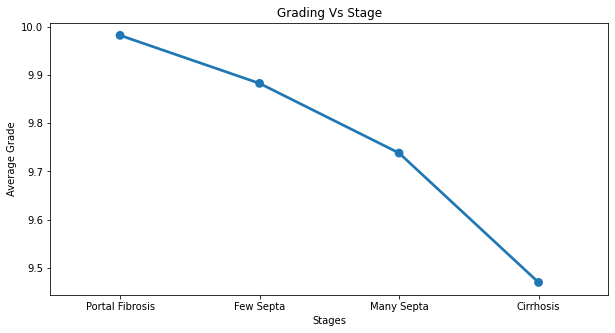

In [25]:
# Query the Greades mean for each stage
s = data_clean.groupby(data_clean.Baseline_histological_staging).Baseline_histological_Grading.mean()

# Plot the mean
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x=s.index, y=s.values, ax=ax)

# Customizations 
plt.title("Grading Vs Stage")
plt.xlabel("Stages")
plt.ylabel("Average Grade")
plt.xticks([0,1,2,3], ['Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis'])
plt.show()

## Comments 
After this deep dive into the Data we find that:
- The Symptoms attributes seems to have a correlation with the target variable, from the heatmap count and the correlation plots, higher stages have all the Symptoms.
- The Disease is also correlated with high cells count (RBCs, WBCs ans platlets). 
- Although the numbers seem to express that the gender does not have any effect on the stage, the Correlation plot indicates the opposite.
- The Grading seems to have a negative Correlation with Stage, the mean Grade for each stage decrease with the stage.

Next we will move on with the model training, First we instantiate a basic model from famous Ml algorithms and find out the best performing models.


## Training 

In [31]:
# Sklearn Imports 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [32]:
# Instantiate One Hot Encoder 
onehot = OneHotEncoder()

# Scaling the Data 
scaler = StandardScaler()

In [33]:
# One Hot Encoding for Symptoms Attributes 
data_clean.iloc[:, np.r_[[1], 3:10]] -= 1

In [34]:
data_clean

,Age,Gender,BMI,Fever,Nausea,Headache,Diarrhea,Fatigue,Jaundice,Epigastric_pain,...,ALT_36,ALT_48,ALT_after_24_w,RNA_Base,RNA_4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baseline_histological_staging
0,56,-1,35,0,-1,-1,-1,0,0,0,...,0,0,0,1,1,1,0,0,13,2
1,46,-1,29,-1,0,0,-1,0,0,-1,...,2,2,2,1,1,1,1,1,4,2
2,57,-1,33,0,0,0,0,-1,-1,-1,...,0,0,0,1,1,0,1,1,4,4
3,49,0,33,-1,0,-1,0,-1,0,-1,...,2,2,1,1,1,1,1,1,10,3
4,59,-1,32,-1,-1,0,-1,0,0,0,...,2,2,1,1,1,1,1,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,-1,29,-1,0,0,0,-1,-1,-1,...,2,2,2,1,1,0,0,0,15,4
1381,55,-1,34,-1,0,0,-1,-1,-1,-1,...,2,2,2,1,1,1,1,1,10,2
1382,42,-1,26,0,0,-1,-1,-1,0,-1,...,2,1,1,1,1,1,1,1,6,2
1383,52,-1,29,0,-1,-1,0,0,0,-1,...,2,2,2,1,1,1,1,1,15,3


In [35]:
for i in data_clean.iloc[:, 14:-2]:
    print(data_clean[i].unique(), i)

[2, 1]
Categories (2, int64): [1 < 2] AST_1
[2, 1]
Categories (2, int64): [1 < 2] ALT_1
[2, 1]
Categories (2, int64): [1 < 2] ALT_4
[2, 1]
Categories (2, int64): [1 < 2] ALT_12
[2, 1]
Categories (2, int64): [1 < 2] ALT_24
[0, 2, 1]
Categories (3, int64): [0 < 1 < 2] ALT_36
[0, 2, 1]
Categories (3, int64): [0 < 1 < 2] ALT_48
[0, 2, 1]
Categories (3, int64): [0 < 1 < 2] ALT_after_24_w
[1]
Categories (1, int64): [1] RNA_Base
[1, 0]
Categories (2, int64): [0 < 1] RNA_4
[1, 0]
Categories (2, int64): [0 < 1] RNA_12
[0, 1]
Categories (2, int64): [0 < 1] RNA_EOT
[0, 1]
Categories (2, int64): [0 < 1] RNA_EF


In [36]:
# Make a copy from original Data fram 
data_encoded = data_clean.copy()

In [37]:
# Encode First ALT Attributes 
alt_encoding = pd.DataFrame(onehot.fit_transform(data_clean.iloc[:, 14:19]).toarray())
alt_encoding.drop(columns = range(0, 10, 2), axis=0, inplace=True)
alt_encoding.rename(columns={idx: col  for idx, col in zip(range(1, 10, 2), data_clean.columns[14:19])}, inplace=True)

data_encoded.iloc[:, 14: 19] = alt_encoding


# Encode the Last ALT Attributes 
alt_encoding_36 = pd.DataFrame(onehot.fit_transform(data_clean.loc[:, data_clean.columns[19:22]]).toarray())
alt_encoding_36.drop(columns=range(0, 9, 3), axis=0, inplace=True)
alt_encoding_36.rename(columns={
    1: data_clean.columns[19]+'_1' ,
    2: data_clean.columns[19]+'_2' ,
    4: data_clean.columns[20]+'_1' ,
    5: data_clean.columns[20]+'_2' ,
    7: data_clean.columns[21]+'_1' ,
    8: data_clean.columns[21]+'_2' ,
}, inplace=True)


# Add Encoding to the 
data_encoded = pd.concat([data_clean.iloc[:, :19], alt_encoding_36, data_clean.iloc[:, 22:]], axis=1)
data_encoded.drop(columns=[data_clean.RNA_Base.name], axis=0, inplace=True)

data_encoded.iloc[:, -1] -= 1 

In [38]:
data_encoded

,Age,Gender,BMI,Fever,Nausea,Headache,Diarrhea,Fatigue,Jaundice,Epigastric_pain,...,ALT_48_1,ALT_48_2,ALT_after_24_w_1,ALT_after_24_w_2,RNA_4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baseline_histological_staging
0,56,-1,35,0,-1,-1,-1,0,0,0,...,0.0,0.0,0.0,0.0,1,1,0,0,13,1
1,46,-1,29,-1,0,0,-1,0,0,-1,...,0.0,1.0,0.0,1.0,1,1,1,1,4,1
2,57,-1,33,0,0,0,0,-1,-1,-1,...,0.0,0.0,0.0,0.0,1,0,1,1,4,3
3,49,0,33,-1,0,-1,0,-1,0,-1,...,0.0,1.0,1.0,0.0,1,1,1,1,10,2
4,59,-1,32,-1,-1,0,-1,0,0,0,...,0.0,1.0,1.0,0.0,1,1,1,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,44,-1,29,-1,0,0,0,-1,-1,-1,...,0.0,1.0,0.0,1.0,1,0,0,0,15,3
1381,55,-1,34,-1,0,0,-1,-1,-1,-1,...,0.0,1.0,0.0,1.0,1,1,1,1,10,1
1382,42,-1,26,0,0,-1,-1,-1,0,-1,...,1.0,0.0,1.0,0.0,1,1,1,1,6,1
1383,52,-1,29,0,-1,-1,0,0,0,-1,...,0.0,1.0,0.0,1.0,1,1,1,1,15,2


In [64]:
# Extracting the Equation Information 
X = data_encoded.iloc[:-7, :-2].values
y = data_encoded.iloc[:, -1].values

In [65]:
X = scaler.fit_transform(X)

In [66]:
# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1378, 1385]

In [ ]:
random_state = 42

# Identify The Classifiers we need 
classifiers = {
    'knn': KNeighborsClassifier(5),
    'NB': GaussianNB(),
    'tree': DecisionTreeClassifier(),
    'forest': RandomForestClassifier(),
    'SV': SVC(probability=True),
    'LR': LogisticRegression(),
    'Boost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100)
}

In [56]:
# Check Distribution of values 
pd.Series(y_train).value_counts()

2    256
3    252
0    231
1    230
dtype: int64

In [57]:
# Metrics 
metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# Cross Validate the models 
scores = {}
for name, clf in classifiers.items():
    print(f'Training {name} model .. ')
    res = cross_validate(clf, X_train, y_train, cv=10, scoring=metrics, return_estimator=True)
#     print(res)
    
    score = {
        "test_f1_weighted": np.mean(res['test_f1_weighted']), 
#              'test_roc_auc_ovr_weighted': np.mean(res['test_roc_auc_ovr_weighted']), 
             'test_precision_weighted': np.mean(res['test_precision_weighted']),
             'test_recall_weighted': np.mean(res['test_recall_weighted']),
             'test_accuracy': np.mean(res['test_accuracy']),
             'estimator': res['estimator'][0]
            }
    
    print("test_f1_weighted", score['test_f1_weighted'])
#     print('test_roc_auc_ovr', score['test_roc_auc_ovr_weighted'])
    print('test_precicison', score['test_precision_weighted'])
    print('test_recall', score['test_recall_weighted'])
    print('accuracy', score['test_accuracy'])
    print('\n')
    
    # Add each model`s scores to scores
    scores[name] = score

Training knn model .. 
test_f1_weighted 0.2739403910427232
test_precicison 0.278878528432267
test_recall 0.27962843642611684
accuracy 0.27962843642611684


Training NB model .. 
test_f1_weighted 0.17731795708001297
test_precicison 0.2330956627230481
test_recall 0.28169029209621993
accuracy 0.28169029209621993


Training tree model .. 


c:\users\moham\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\moham\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\moham\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\user

test_f1_weighted 0.23589059747112429
test_precicison 0.2373122361080992
test_recall 0.2384020618556701
accuracy 0.2384020618556701


Training forest model .. 
test_f1_weighted 0.23650448516297554
test_precicison 0.2375807611711839
test_recall 0.23932560137457046
accuracy 0.23932560137457046


Training SV model .. 
test_f1_weighted 0.24707862414142215
test_precicison 0.25442961883322157
test_recall 0.2548002577319588
accuracy 0.2548002577319588


Training LR model .. 
test_f1_weighted 0.24890118371835418
test_precicison 0.2553829472204489
test_recall 0.2537800687285223
accuracy 0.2537800687285223


Training Boost model .. 
test_f1_weighted 0.2551388903374493
test_precicison 0.2595776722669583
test_recall 0.2580111683848797
accuracy 0.2580111683848797




In [58]:
# Find the best estimator according to one metric
choosen = 'test_' + metrics[0]
best_metric = [(name, res[choosen]) for name, res in scores.items()]
best_estimator = max(best_metric, key=lambda x: x[1])
print(f"The best estimator is {best_estimator[0]} with Score {best_estimator[1]} ({choosen})")

The best estimator is NB with Score 0.28169029209621993 (test_accuracy)
